### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта

## ОТЧЕТ ПО КОНТРОЛЬНОЙ РАБОТЕ № 3


### Дисциплина: Методы машинного обучения

##### Студент:  Матюшкин Денис Владимирович
##### Группа:   НПИбд-02-21

## Москва 2024
***

### Вариант № 27

Вот формулы в LaTeX для данных задач:

1. Функция одной переменной
$f(x) = \frac{e^{-x} + 1}{1 + x^2}, \quad x \in [0, 4]$

2. Порядок производной функции одной переменной 3

3. Функция двух переменных:
$f(x,y) = (x^2 + y^2) \ln(1 + x + y), \quad (x,y) \in [0,2] \times [0, 2]$

4. Порядок смешанной производной функции двух переменных:
$\frac{\partial^3}{\partial x \partial y^2}$

5. Показатель качества регрессии: среднее квадратичное логарифмическое отклонение (MSLE)

### Решение

1. Постройте тензор ранга 1 (вектор) со значениями заданной в индивидуальном задании функции одной переменной на заданном в индивидуальном задании отрезке и определите максимальное и минимальное значения функции.

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x = tf.constant(np.linspace(0, 4, 100), dtype=tf.float32)
y = (tf.exp(-x) + 1) / (1 + x**2)
max = tf.reduce_max(y)
min = tf.reduce_min(y)

print(f'Максимальное знач. функции: {max}')
print(f'Минимальное знач. функции: {min}')

Максимальное знач. функции: 2.0
Минимальное знач. функции: 0.0599009208381176


2. Постройте график функции с прямыми, соответствующими максимальному и минимальному значениям, подписывая оси и рисунок и создавая легенду.

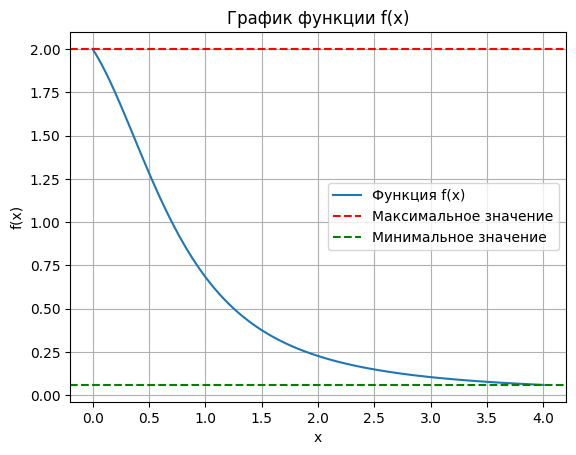

In [ ]:
plt.plot(x, y, label='Функция f(x)')
plt.axhline(max, color='r', linestyle='--', label='Максимальное значение')
plt.axhline(min, color='g', linestyle='--', label='Минимальное значение')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('График функции f(x)')
plt.legend()
plt.grid(True)

3. Найдите значения производной от функции порядка, указанного в индивидуальном задании, и постройте график полученной функции, подписывая оси и рисунок.

In [ ]:
with tf.GradientTape() as gt1:
    gt1.watch(x)
    with tf.GradientTape() as gt2:
        gt2.watch(x)
        with tf.GradientTape() as gt3:
            gt3.watch(x)
            y = (tf.exp(-x) + 1) / (1 + x**2)
        dy_dx = gt3.gradient(y, x)
    d2y_dx2 = gt2.gradient(dy_dx, x)
d3y_dx3 = gt1.gradient(d2y_dx2, x)

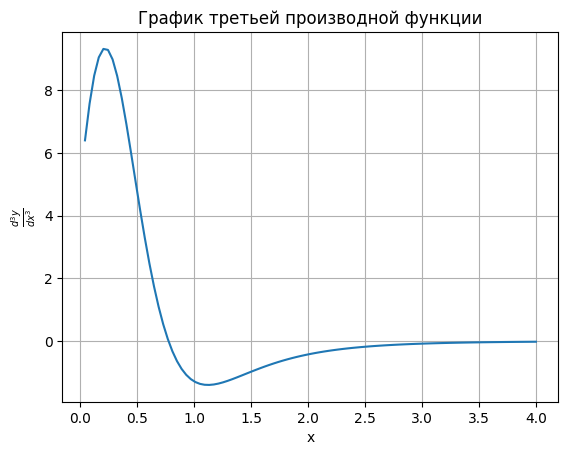

In [ ]:
plt.plot(x, d3y_dx3)
plt.xlabel('x')
plt.ylabel('$\\frac{d^3y}{dx^3}$')
plt.title('График третьей производной функции')
plt.grid(True)

4. Постройте тензор ранга 2 (матрицу) со значениями заданной в индивидуальном задании функции двух переменных на заданном в индивидуальном задании прямоугольнике и определите максимальное и минимальное значения функции.

In [ ]:
x_values = np.linspace(0, 2, 100)
y_values = np.linspace(0, 2, 100)
X, Y = tf.meshgrid(x_values, y_values)
Z = (X**2 + Y**2) * np.log(1 + X + Y)

max = tf.reduce_max(Z)
min = tf.reduce_min(Z)

print(f'Максимальное знач. функции: {max}')
print(f'Минимальное знач. функции: {min}')

Максимальное знач. функции: 12.875503299472802
Минимальное знач. функции: 0.0


5. Постройте 3d график поверхности функции двух переменных, подписывая оси и рисунок.

In [ ]:
from matplotlib import cm

Text(0.5, 0.92, 'График поверхности функции двух переменных')

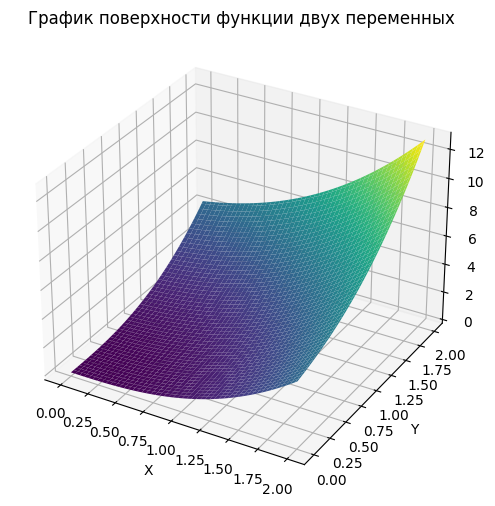

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('График поверхности функции двух переменных')

6. Найдите значения смешанной производной от функции порядка, указанного в индивидуальном задании, и постройте 3d график поверхности полученной функции, подписывая оси и рисунок.

In [ ]:
with tf.GradientTape() as gt1:
    gt1.watch([X, Y])
    with tf.GradientTape() as gt2:
        gt2.watch([X, Y])
        Z = (X**2 + Y**2) * np.log(1 + X + Y)
    d2Z_dXdY = gt2.gradient(Z, [X, Y])
d3Z_dXdY2 = gt1.gradient(d2Z_dXdY[1], Y)

Text(0.5, 0.92, 'График смешанной производной функции')

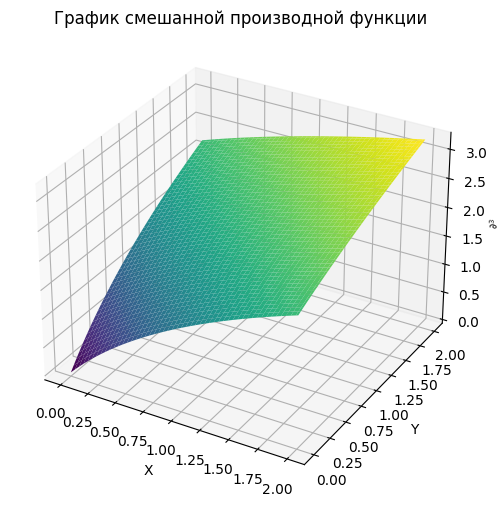

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, d3Z_dXdY2, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('$\\frac{\partial^3}{\partial x \partial y^2}$')
ax.set_title('График смешанной производной функции')

7. Решите задачу парной линейной регрессии при помощи модели TensorFlow, рассматривая тензор ранга 1 из пункта 1 задания как значения зависимой переменной (отклика), а точки отрезка из индивидуального задания как значения независимой переменной (предиктора). Предварительно масштабируйте независимую и зависимую переменные на интервал $[0, 1]$. Оцените качество полученной модели по показателю качества регрессии, указанному в индивидуальном задании. Количество эпох, скорость обучения и начальные значения весов выберите самостоятельно, обеспечивая сходимость итерационной процедуры.

Масштабируем независимую и зависимую переменную:

In [ ]:
x_m = (x - tf.reduce_min(x))/(tf.reduce_max(x) - tf.reduce_min(x))
y_m = (y - tf.reduce_min(y))/(tf.reduce_max(y) - tf.reduce_min(y))

Задаим класс для модели парной линейной регрессии:

In [ ]:
class Model(object):
    def __init__(self):
        self.w = tf.Variable(1.)
        self.b = tf.Variable(0.)

    def __call__(self, x):
        return self.w * x + self.b

model = Model()

Будем использовать функцию потерь: среднее квадратичное логарифмическое отклонение (MSLE)

In [ ]:
def msle(predicted_y, target_y):
    return tf.reduce_mean(tf.math.square(tf.math.log1p(target_y) - tf.math.log1p(predicted_y)))

Реализуем базовый градиентный спуск:

In [ ]:
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as t:
        current_loss = msle(model(inputs), outputs)
    dw, db = t.gradient(current_loss, [model.w, model.b])
    model.w.assign_sub(learning_rate * dw)
    model.b.assign_sub(learning_rate * db)

    return current_loss

Запустим цикл обучения:

In [ ]:
model = Model()

epochs = 300
msle_values = []
for epoch in range(epochs):
    current_loss = train(model, x_m, y_m, learning_rate=0.1)
    msle_values.append(current_loss)
    if (epoch + 1) % 10 == 0:
        print('Эпоха %2d: MSLE=%2.5f' % (epoch, current_loss))

Эпоха  9: MSLE=0.15146
Эпоха 19: MSLE=0.12372
Эпоха 29: MSLE=0.10213
Эпоха 39: MSLE=0.08453
Эпоха 49: MSLE=0.07025
Эпоха 59: MSLE=0.05872
Эпоха 69: MSLE=0.04943
Эпоха 79: MSLE=0.04197
Эпоха 89: MSLE=0.03596
Эпоха 99: MSLE=0.03114
Эпоха 109: MSLE=0.02725
Эпоха 119: MSLE=0.02412
Эпоха 129: MSLE=0.02159
Эпоха 139: MSLE=0.01955
Эпоха 149: MSLE=0.01789
Эпоха 159: MSLE=0.01655
Эпоха 169: MSLE=0.01546
Эпоха 179: MSLE=0.01457
Эпоха 189: MSLE=0.01385
Эпоха 199: MSLE=0.01326
Эпоха 209: MSLE=0.01277
Эпоха 219: MSLE=0.01238
Эпоха 229: MSLE=0.01206
Эпоха 239: MSLE=0.01179
Эпоха 249: MSLE=0.01157
Эпоха 259: MSLE=0.01140
Эпоха 269: MSLE=0.01125
Эпоха 279: MSLE=0.01113
Эпоха 289: MSLE=0.01103
Эпоха 299: MSLE=0.01095


8. Постройте кривую обучения для показателя качества регрессии, указанного в индивидуальном задании, с зависимостью от количества эпох. Показатель качества регрессия реализуйте как функцию с использованием функций модуля `tf.math`.

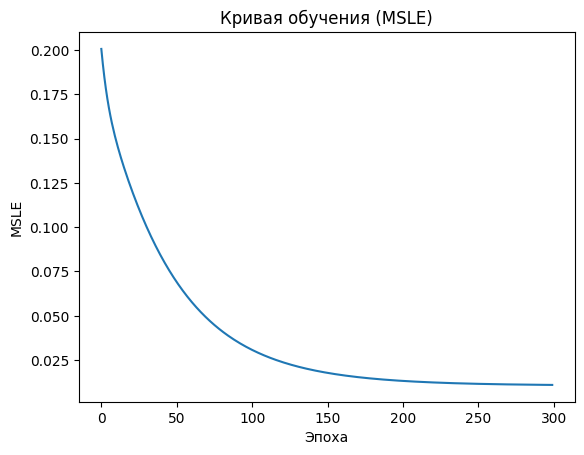

In [ ]:
plt.plot(range(epochs), msle_values)
plt.xlabel('Эпоха')
plt.ylabel('MSLE')
plt.title('Кривая обучения (MSLE)')
plt.show()

9. Изобразите на графике точки набора данных (независимой и зависимой переменных) и линию построенной парной регрессии, подписывая оси и рисунок и создавая легенду.

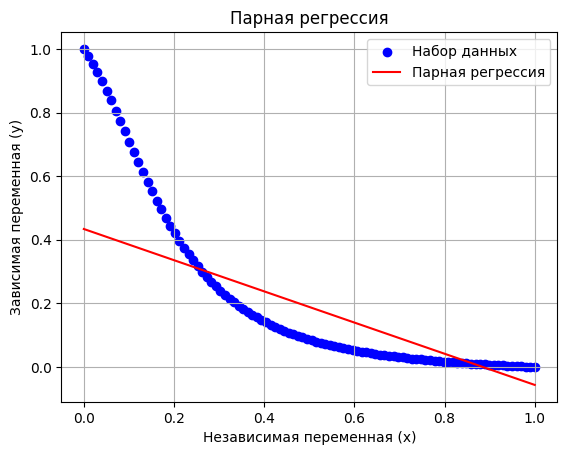

In [ ]:
plt.scatter(x_m.numpy(), y_m.numpy(), label='Набор данных', color='blue')

predicted_y = model(x_m)
plt.plot(x_m.numpy(), predicted_y.numpy(), label='Парная регрессия', color='red')
plt.xlabel('Независимая переменная (x)')
plt.ylabel('Зависимая переменная (y)')
plt.title('Парная регрессия')
plt.legend()
plt.grid(True)